# Geometries

## Mach-Zender Interferometer

Define the needed constants, initialize the required unitary operators, and define the interferometer.

In [1]:
from mwave import symbolic as msym
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

# Set up symbols for symbolic computation
m, c, hbar, k, g, gamma, delta, n, T, t_traj = sp.symbols('m c hbar k g gamma delta n T t_traj', real=True)
k_eff = 2*k

# Register constants
msym.set_constants(m=m, c=c, hbar=hbar, t_traj=t_traj)

# Define unitary operators needed for an MZ interferometer
bs = msym.Beamsplitter(0, n, delta, k_eff)
mirror = msym.Mirror(0, n, delta, k_eff)
free = msym.FreeEv(T, gravity=g, gravity_grad=gamma)

# Create interferometer object, perform MZ sequence
ifr = msym.Interferometer()
(bs @ (free @ (mirror @ (free @ (bs @ ifr)))))

Generate and optionally vizualize the directed tree structure representing the interferometer object.

In [2]:
# Create a graphviz object of the tree
d_test = ifr.generate_graph()

# Uncomment to display the graph
# d_test.view()

Check for interferance, set the gravity gradient to zero as otherwise the interferometer won’t perfectly close and no interferance will be detected.

In [3]:
inodes = ifr.interfere(subs={gamma: 0})

Determine which port each output is in

In [4]:
iports, jports, noport = ifr.get_ports({n:'upper', 0: 'lower'})

Check that we don’t have any unexpected ports

In [5]:
if len(jports) != 0 or len(noport) != 0:
    print('Unexpected output')

Set interferometer parameters for plotting

In [6]:
subs = {m: 1, c: 1, hbar: 1, k: 1, g: 0.3, gamma: 0.001, delta: 4*3, n: 3, T: 5}

Determine the final interferometer time by evaluating the value of t at the end of the interferometer. We can pick a random interferometer port to do this.

In [7]:
tfinal = float(iports['upper'][0].t.evalf(subs=subs))

Plot the trajectory of the interferometer paths

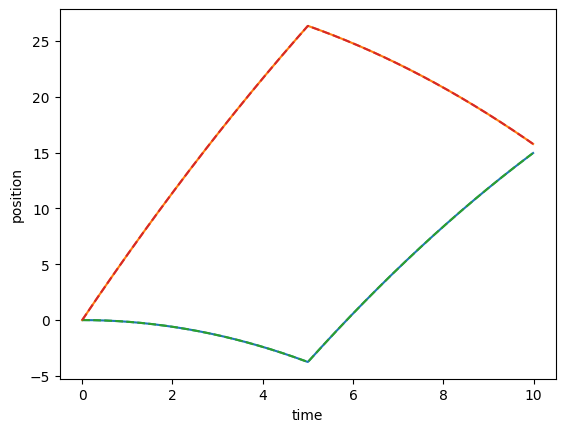

In [8]:
t = np.linspace(0, tfinal, 1000)
plt.figure()
for node_pair, ls in zip([iports['upper'], iports['lower']], ['-', '--']):
    fnc_traj = node_pair[0].get_trajectory(subs=subs)
    plt.plot(t, fnc_traj(t), linestyle=ls)
    fnc_traj = node_pair[1].get_trajectory(subs=subs)
    plt.plot(t, fnc_traj(t), linestyle=ls)
plt.xlabel('time')
plt.ylabel('position')
plt.show()

Compute the phase of the interferometer

In [9]:
# Compute the differential phase
phi1, phi2 = ifr.phases()
print(f'phase_1={sp.simplify(phi1)}')
print(f'phase_2={sp.simplify(phi2)}')

# Print out the total population, check it is equal to 1
pop = 0
for node in ifr.get_nodes():
    pop += (node.get_amp())**2
print(f'total population sum={sp.simplify(pop)}')

phase_1=(-3*T**10*g*gamma**4*k*m*n + 10*T**9*gamma**4*hbar*k**2*n**2 - 34*T**8*g*gamma**3*k*m*n + 56*T**7*gamma**3*hbar*k**2*n**2 - 53*T**6*g*gamma**2*k*m*n + 60*T**5*gamma**2*hbar*k**2*n**2 + 84*T**4*g*gamma*k*m*n - 144*T**3*gamma*hbar*k**2*n**2 + 144*T**2*g*k*m*n - 72*pi*m)/(72*m)
phase_2=T**2*k*n*(-3*T**8*g*gamma**4*m + 10*T**7*gamma**4*hbar*k*n - 34*T**6*g*gamma**3*m + 56*T**5*gamma**3*hbar*k*n - 53*T**4*g*gamma**2*m + 60*T**3*gamma**2*hbar*k*n + 84*T**2*g*gamma*m - 144*T*gamma*hbar*k*n + 144*g*m)/(72*m)
total population sum=1


## Simultaneous Conjugate Interferometer

Define the needed constants, initialize the required unitary operators, and define the interferometer.

In [1]:
from mwave import symbolic as msym
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

# Set up symbols for symbolic computation
m, c, hbar, k, omega_r, delta, n, omega_m, T, Tp, t_traj = sp.symbols('m c hbar k omega_r delta n omega_m T Tp t_traj', real=True)
k_eff = 2*k

# Register constants
msym.set_constants(m=m, c=c, hbar=hbar, t_traj=t_traj)

# Define unitary operators needed for an SCI interferometer
bs1 = msym.Beamsplitter(n, 0, delta, k_eff)
bs2 = msym.Beamsplitter(0, -n, delta - omega_m, k_eff)
bs2u = msym.Beamsplitter(n, 2*n, delta + omega_m, k_eff)
fe1 = msym.FreeEv(T)
fe2 = msym.FreeEv(Tp)

# Create interferometer object, perform MZ sequence
ifr = msym.Interferometer()
ifr.apply(bs1)
ifr.apply(fe1)
ifr.apply(bs1)
ifr.apply(fe2)
ifr.apply(bs2)
ifr.apply(bs2u)
ifr.apply(fe1)
ifr.apply(bs2)
ifr.apply(bs2u)

Generate and optionally vizualize the directed tree structure representing the interferometer object.

In [2]:
# Create a graphviz object of the tree
d_test = ifr.generate_graph()

# Uncomment to display the graph
# d_test.view()

Check for interferance, set the gravity gradient to zero as otherwise the interferometer won't perfectly close and no interferance will be detected.

In [3]:
inodes = ifr.interfere()

Determine which port each output is in

In [4]:
iports, jports, noport = ifr.get_ports({2*n:'A', n:'B', 0:'C', -n:'D'})

Check that we don't have any unexpected ports

In [5]:
if len(jports) != 4 or len(noport) != 0:
    print('Unexpected output')

Set interferometer parameters for plotting

In [6]:
subs = {m: 1, c: 1, hbar: 1, k: 1, delta: 4*3, n: 3, T: 5, Tp: 1}

Determine the final interferometer time by evaluating the value of t at the end of the interferometer. We can pick a random interferometer port to do this.

In [7]:
tfinal = float(iports['A'][0].t.evalf(subs=subs))

Plot the trajectory of the interferometer paths

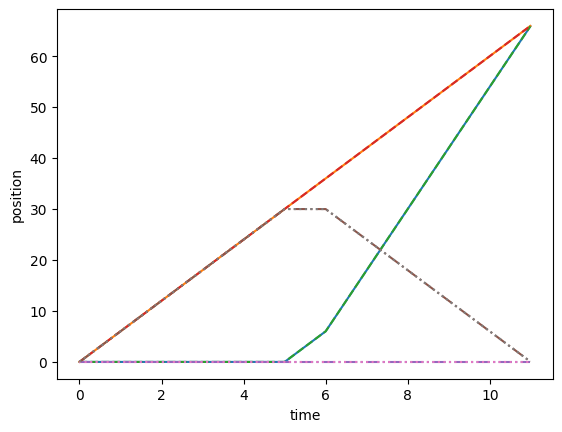

In [8]:
t = np.linspace(0, tfinal, 1000)
plt.figure()
for port, ls in zip(['A', 'B', 'C', 'D'], ['-', '--', '-.', ':']):
    fnc_traj = iports[port][0].get_trajectory(subs=subs)
    plt.plot(t, fnc_traj(t), linestyle=ls)
    fnc_traj = iports[port][1].get_trajectory(subs=subs)
    plt.plot(t, fnc_traj(t), linestyle=ls)
plt.xlabel('time')
plt.ylabel('position')
plt.show()

Compute the phase of the interferometer

In [9]:
# Compute the differential phase
phiA, phiB, phiC, phiD = ifr.phases()
print(f'differential phase={sp.simplify(phiA - phiC).subs(k, sp.sqrt(2*m*omega_r/hbar))}')

# Print out the total population, check it is equal to 1
pop = 0
for node in ifr.get_nodes():
    pop += (node.get_amp())**2
print(f'total population sum={sp.simplify(pop)}')

differential phase=16*T*n**2*omega_r - 2*T*n*omega_m - 2*pi
total population sum=1
